In [798]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from scipy import stats
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
#from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVC, SVR
from mlxtend.plotting import plot_learning_curves
from scipy.stats import kurtosis
from scipy.stats import skew
import re
import warnings
warnings.simplefilter('ignore')

<h3> Reading Test and Train Data

In [1083]:
df_train=pd.read_excel('Train.xlsx')

In [1084]:
df_train.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,2014-05-30,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,2014-09-13,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,2014-09-28,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,2014-06-05,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,2015-02-07,640000


In [1085]:
df_train.shape

(16810, 19)

In [1135]:
df_test=pd.read_excel('Test.xlsx')

In [1087]:
df_test.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation
0,PR51101,1,NY,BATHGATE,3860 3 AVENUE,10457,2929,117,02 TWO FAMILY HOMES,2,0,2,2498,2394,1995,1,B1,2013-06-24
1,PR51102,1,NY,BATHGATE,455 E. 179TH STREET,10457,3036,65,02 TWO FAMILY DWELLINGS,2,0,2,2033,2340,1994,1,B1,2014-08-28
2,PR51103,1,NY,BATHGATE,4415 3 AVENUE,10457,3048,51,14 RENTALS - 4-10 UNIT,4,1,5,2500,6000,1963,2,S4,2015-01-31
3,PR51104,1,NY,BATHGATE,407 EAST 174 STREET,10457,2899,34,30 WAREHOUSES,0,1,1,3439,3320,1951,4,E1,2015-03-12
4,PR51105,1,NY,EAST TREMONT,2175 CROTONA AVENUE,10457,3083,40,03 THREE FAMILY DWELLINGS,3,0,3,1348,2931,1997,1,C0,2014-06-07


In [827]:
df_test.shape

(2936, 18)

<h3> Checking Data 

In [828]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Borough,16810.0,3.439143,1.398950,1.0,2.00,3.0,5.00,5.0
ZipCode,16810.0,10871.027543,522.996869,10001.0,10312.00,11207.0,11364.00,11694.0
Block,16810.0,5428.122308,3710.031921,6.0,2401.25,5050.0,7376.75,16314.0
Lot,16810.0,266.327722,542.420132,1.0,25.00,52.0,138.00,5323.0
NoOfResidentialUnits,16810.0,1.862225,8.027805,0.0,1.00,1.0,2.00,437.0
NoOfCommercialUnits,16810.0,0.137775,2.185857,0.0,0.00,0.0,0.00,252.0
TotalNoOfUnits,16810.0,2.000000,8.472771,1.0,1.00,1.0,2.00,437.0
LandAreaInSqFt,16810.0,10924.918441,58376.198100,1.0,2100.00,3200.0,5000.00,5612000.0
GrossAreaInSqFt,16810.0,3612.156871,16273.783452,1.0,1224.00,1750.0,2449.75,1172005.0
YearOfConstruction,16810.0,1973.982867,23.632595,1941.0,1951.00,1968.0,1998.00,2012.0


In [833]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Borough,2936.0,3.385559,1.364623,1.0,2.0,3.0,5.00,5.0
ZipCode,2936.0,10837.683924,526.594771,10001.0,10310.0,11105.0,11361.25,11694.0
Block,2936.0,5170.971730,3581.310989,31.0,2373.0,4772.5,7106.00,16262.0
Lot,2936.0,279.483651,562.104975,1.0,25.0,54.0,146.00,5026.0
NoOfResidentialUnits,2936.0,1.656335,4.456347,0.0,1.0,1.0,2.00,128.0
NoOfCommercialUnits,2936.0,0.136921,1.211945,0.0,0.0,0.0,0.00,50.0
TotalNoOfUnits,2936.0,1.793256,4.733782,1.0,1.0,1.0,2.00,130.0
LandAreaInSqFt,2936.0,11015.183924,37702.788446,1.0,2100.0,3126.5,5000.00,484555.0
GrossAreaInSqFt,2936.0,4060.355586,14807.827309,80.0,1222.0,1720.0,2440.25,231891.0
YearOfConstruction,2936.0,1975.443460,23.707392,1941.0,1955.0,1971.0,2000.00,2012.0


In [834]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})


In [835]:
inspect_data(df_train)

,Data Type,No of Levels,Levels
PropertyID,object,16810,['PR11101' 'PR11102' 'PR11103' ... 'PR27908' '...
Borough,int64,5,[1 3 2 5 4]
State,object,1,['NY']
Surroundings,object,243,['BATHGATE' 'EAST TREMONT' 'FORDHAM' 'MOUNT HO...
Address,object,15219,['1473 CROTONA PLACE' '453 EAST 181' '511 EAST...
ZipCode,int64,174,[10456 10457 10458 10460 10453 10452 10306 103...
Block,int64,6405,[2927 3037 2912 ... 1496 1576 2065]
Lot,int64,1299,[127 110 155 ... 1171 1528 2249]
BldgClassCategory,object,52,['02 TWO FAMILY DWELLINGS' '03 THREE FAMILY DW...
NoOfResidentialUnits,int64,70,[2 3 4 1 0 70 38 74 16 8 18 20 6 14 5 7 71 37 ...


In [832]:
inspect_data(df_test)

,Data Type,No of Levels,Levels
PropertyID,object,2936,['PR51101' 'PR51102' 'PR51103' ... 'PR54034' '...
Borough,int64,5,[1 3 2 5 4]
State,object,1,['NY']
Surroundings,object,223,['BATHGATE' 'EAST TREMONT' 'FORDHAM' 'NEW DORP...
Address,object,2766,['3860 3 AVENUE' '455 E. 179TH STREET' '4415 3...
ZipCode,int64,164,[10457 10460 10306 10304 10305 10308 10312 112...
Block,int64,2131,[2929 3036 3048 ... 123 149 2095]
Lot,int64,583,[117 65 51 34 40 142 14 140 139 133 5 116 80 4...
BldgClassCategory,object,37,['02 TWO FAMILY HOMES' '02 TWO FAMILY DWELLIN...
NoOfResidentialUnits,int64,24,[2 4 0 3 1 6 8 109 7 11 15 80 90 9 13 46 55 71...


<h4> Checking for Null Values

In [836]:
df_train.isnull().sum().sum()

0

In [837]:
df_test.isnull().sum().sum()

0

In [1136]:
#converting to lower case
df_train.columns = [x.lower() for x in df_train.columns]

df_test.columns = [x.lower() for x in df_test.columns]

<h4> Checking for Unique columns and dropping

In [1089]:
def unique(df):
    del_cols=[]
    for i in df.columns:
        if df[i].nunique()<2:
            del_cols.append(i)
            df.drop(del_cols,axis=1,inplace=True)
    return del_cols

In [1090]:
unique(df_train)

['state']

In [1137]:
unique(df_test)

['state']

In [1138]:
# Saving Propertyid of Test data
df_train.drop('propertyid',axis=1,inplace=True)
df_id=df_test['propertyid']
df_test.drop('propertyid',axis=1,inplace=True)

In [1139]:
print('Train Data Shape:',df_train.shape)
print('Test Data Shape:',df_test.shape)

Train Data Shape: (16810, 17)
Test Data Shape: (2936, 16)


In [844]:
num_cols=df_train.select_dtypes(include=['int64','float64']).columns

In [845]:
cat_cols = df_train.columns.difference(num_cols).tolist()


In [846]:
num_cols

Index(['borough', 'zipcode', 'block', 'lot', 'noofresidentialunits',
       'noofcommercialunits', 'totalnoofunits', 'landareainsqft',
       'grossareainsqft', 'yearofconstruction', 'taxclass_atevaluationtime',
       'propertyevaluationvalue'],
      dtype='object')

In [847]:
cat_cols

['address',
 'bldgclass_atevaluationtime',
 'bldgclasscategory',
 'dateofevaluation',
 'surroundings']

<h3> Comparing Data w.r.t Train and Test

In [848]:
def compare_train_test(train_data, test_data):
    train_levels = train_data.apply(lambda x: set(x.unique()),axis=0)
    test_levels = test_data.apply(lambda x: set(x.unique()),axis=0)
    extra = []
    missing = []
    for x1,x2 in zip(train_levels, test_levels):
        missing.append(x1-x2)
        extra.append(x2-x1)
    return pd.DataFrame({"Train Data Type":train_data.dtypes, "Test Data Type":test_data.dtypes,
                         "Train #Levels":train_data.apply(lambda x: x.unique().shape[0],axis=0), "Test #Levels":test_data.apply(lambda x: x.unique().shape[0],axis=0),
                         "Test Missing":missing, "Test Extra":extra})

<h4> Seperating Target and predictor variables

In [1131]:
y=df_train['propertyevaluationvalue']
X=df_train.drop('propertyevaluationvalue',axis=1)

In [1095]:
X11=df_train.drop('propertyevaluationvalue',axis=1)

In [1118]:
X11.shape

(16810, 16)

In [850]:
X.shape

(16810, 16)

In [851]:
compare_train_test(X,df_test)

,Train Data Type,Test Data Type,Train #Levels,Test #Levels,Test Missing,Test Extra
borough,int64,int64,5,5,{},{}
surroundings,object,object,243,223,"{TRIBECA, SOHO, UPPER EAST SIDE (96-110), MANH...",{BRONX PARK}
address,object,object,15219,2766,"{408 THOMAS STREET, 616 WALES AVE, 155-25 LIND...","{4086 DEREIMER AVENUE, 4007 LACONIA AVENUE, 25..."
zipcode,int64,int64,174,164,"{11430, 10280, 10027, 10033, 10034, 10035, 100...",{}
block,int64,int64,6405,2131,"{6, 8198, 8199, 8200, 8201, 8202, 8205, 14, 82...","{4101, 12320, 2085, 39, 10282, 2095, 8257, 416..."
lot,int64,int64,1299,583,"{2048, 2073, 4123, 2076, 2084, 2089, 2095, 209...","{4106, 4627, 4628, 4117, 4629, 535, 3607, 2080..."
bldgclasscategory,object,object,52,37,"{32 HOSPITAL AND HEALTH FACILITIES, 35 INDOOR...",{}
noofresidentialunits,int64,int64,70,24,"{256, 10, 12, 16, 17, 18, 20, 21, 22, 24, 152,...","{80, 109, 13, 23}"
noofcommercialunits,int64,int64,18,12,"{8, 10, 14, 47, 15, 26, 252}",{50}
totalnoofunits,int64,int64,75,24,"{256, 128, 10, 12, 16, 17, 18, 19, 20, 21, 22,...","{80, 130, 109, 23}"


In [397]:
#X['address']=X.address.apply(lambda x:x.replace(' ','_'))

In [141]:
#df_test['address']=df_test.apply(lambda x:x.replace(' ','_'))

<h3> <center> <h3> Feature Engineering, Checking Categorical and Numerical columns

<h3> Categorical columns

In [877]:
cat_cols

['address',
 'bldgclass_atevaluationtime',
 'bldgclasscategory',
 'dateofevaluation',
 'surroundings']

<h4>bldgclass_atevaluationtime Column

In [1132]:
X['bldgclass_atevaluationtime'].value_counts()

A5    3454
A2    1834
B2    1778
R4    1745
B1    1716
      ... 
R8       1
Z3       1
R6       1
I7       1
M3       1
Name: bldgclass_atevaluationtime, Length: 101, dtype: int64

In [1133]:
X['bldgclass_atevaluationtime']=X['bldgclass_atevaluationtime'].apply(lambda x:x.replace(x,x[0]))
X['bldgclass_atevaluationtime'].value_counts()

A    7333
B    4618
R    2528
C    1311
K     194
S     144
H     144
E     140
G      98
O      82
D      69
F      68
M      24
V      15
W      13
I      11
Z       8
P       6
Q       2
N       2
Name: bldgclass_atevaluationtime, dtype: int64

In [1130]:
X11['bldgclass_atevaluationtime'].value_counts()[:21]

A5        3454
A2        1834
B2        1778
R4        1745
B1        1716
C0        1133
A1        1116
others     774
B9         640
B3         484
R3         451
A0         374
A9         317
A3         214
R1         187
H2         140
K1         122
R2          82
C3          74
E1          67
S2          57
Name: bldgclass_atevaluationtime, dtype: int64

In [1121]:
c=list(X11['bldgclass_atevaluationtime'].value_counts()[:21].keys())

In [1123]:
c

['A5',
 'A2',
 'B2',
 'R4',
 'B1',
 'C0',
 'A1',
 'B9',
 'B3',
 'R3',
 'A0',
 'A9',
 'A3',
 'R1',
 'H2',
 'K1',
 'R2',
 'C3',
 'E1',
 'S2',
 'C1']

In [1126]:
for i in list(X11['bldgclass_atevaluationtime'].value_counts().keys()):
    if i in c:
        pass
    else:
        X11['bldgclass_atevaluationtime']=X11['bldgclass_atevaluationtime'].replace(i,'others')

In [1127]:
X11['bldgclass_atevaluationtime'].value_counts()

A5        3454
A2        1834
B2        1778
R4        1745
B1        1716
C0        1133
A1        1116
others     774
B9         640
B3         484
R3         451
A0         374
A9         317
A3         214
R1         187
H2         140
K1         122
R2          82
C3          74
E1          67
S2          57
C1          51
Name: bldgclass_atevaluationtime, dtype: int64

In [1099]:
df_test['bldgclass_atevaluationtime'].value_counts()

A5    630
R4    328
B2    319
B1    306
A2    294
     ... 
O8      1
G4      1
D4      1
C5      1
A6      1
Name: bldgclass_atevaluationtime, Length: 65, dtype: int64

In [1100]:
df_test['bldgclass_atevaluationtime']=df_test['bldgclass_atevaluationtime'].apply(lambda x:x.replace(x,x[0]))

In [1101]:
df_test['bldgclass_atevaluationtime'].value_counts()

A    1249
B     826
R     467
C     209
H      45
K      37
E      24
S      22
O      15
G      13
D      11
F      10
Z       3
W       2
V       2
M       1
Name: bldgclass_atevaluationtime, dtype: int64

In [1142]:
df_test['bldgclass_atevaluationtime'].value_counts()[:19]

A5    630
R4    328
B2    319
B1    306
A2    294
C0    187
A1    162
B9    122
B3     79
R3     77
A0     67
A9     59
H2     44
R1     39
A3     29
K1     21
E1     17
C1     12
R2     10
Name: bldgclass_atevaluationtime, dtype: int64

In [1152]:
dd=list(df_test['bldgclass_atevaluationtime'].value_counts()[:19].keys())

In [1153]:
for i in list(df_test['bldgclass_atevaluationtime'].value_counts().keys()):
    if i in dd:
        pass
    else:
        df_test['bldgclass_atevaluationtime']=df_test['bldgclass_atevaluationtime'].replace(i,'others')

In [1155]:
df_test['bldgclass_atevaluationtime'].value_counts()

A5        630
R4        328
B2        319
B1        306
A2        294
C0        187
A1        162
others    134
B9        122
B3         79
R3         77
A0         67
A9         59
H2         44
R1         39
A3         29
K1         21
E1         17
C1         12
R2         10
Name: bldgclass_atevaluationtime, dtype: int64

In [419]:
#X['bldgclasscategory']=X.bldgclasscategory.apply(lambda x:x.replace('_',' '))

<h4> bldgclasscategory column

In [1102]:
X['bldgclasscategory']

0                  02 TWO FAMILY DWELLINGS
1                03 THREE FAMILY DWELLINGS
2                  02 TWO FAMILY DWELLINGS
3                  02 TWO FAMILY DWELLINGS
4                  02 TWO FAMILY DWELLINGS
                       ...                
16805      13 CONDOS - ELEVATOR APARTMENTS
16806      13 CONDOS - ELEVATOR APARTMENTS
16807      13 CONDOS - ELEVATOR APARTMENTS
16808      13 CONDOS - ELEVATOR APARTMENTS
16809    08  RENTALS - ELEVATOR APARTMENTS
Name: bldgclasscategory, Length: 16810, dtype: object

In [1103]:
cc=list(X['bldgclasscategory'].value_counts().keys())

In [1104]:
cc

['01 ONE FAMILY DWELLINGS',
 '01  ONE FAMILY HOMES',
 '02 TWO FAMILY DWELLINGS',
 '02  TWO FAMILY HOMES',
 '13 CONDOS - ELEVATOR APARTMENTS',
 '03 THREE FAMILY DWELLINGS',
 '03  THREE FAMILY HOMES',
 '04 TAX CLASS 1 CONDOS',
 '15 CONDOS - 2-10 UNIT RESIDENTIAL',
 '25  LUXURY HOTELS',
 '22  STORE BUILDINGS',
 '07  RENTALS - WALKUP APARTMENTS',
 '22 STORE BUILDINGS',
 '12 CONDOS - WALKUP APARTMENTS',
 '07 RENTALS - WALKUP APARTMENTS',
 '30  WAREHOUSES',
 '30 WAREHOUSES',
 '29  COMMERCIAL GARAGES',
 '44 CONDO PARKING',
 '21  OFFICE BUILDINGS',
 '08  RENTALS - ELEVATOR APARTMENTS',
 '29 COMMERCIAL GARAGES',
 '27  FACTORIES',
 '21 OFFICE BUILDINGS',
 '27 FACTORIES',
 '14  RENTALS - 4-10 UNIT',
 '14 RENTALS - 4-10 UNIT',
 '37 RELIGIOUS FACILITIES',
 '08 RENTALS - ELEVATOR APARTMENTS',
 '05  TAX CLASS 1 VACANT LAND',
 '10  COOPS - ELEVATOR APARTMENTS',
 '37  RELIGIOUS FACILITIES',
 '32 HOSPITAL AND HEALTH FACILITIES',
 '33 EDUCATIONAL FACILITIES',
 '33  EDUCATIONAL FACILITIES',
 '46 CONDO STO

In [865]:
len(cc)

52

In [345]:
#df_test['bldgclasscategory']=df_test.bldgclasscategory.apply(lambda x:x.replace(' ','_'))

In [1105]:
df_test['bldgclasscategory'].value_counts()

01 ONE FAMILY DWELLINGS                      773
02 TWO FAMILY DWELLINGS                      491
01  ONE FAMILY HOMES                         481
02  TWO FAMILY HOMES                         342
13 CONDOS - ELEVATOR APARTMENTS              328
03 THREE FAMILY DWELLINGS                    104
03  THREE FAMILY HOMES                        83
04 TAX CLASS 1 CONDOS                         77
25  LUXURY HOTELS                             44
15 CONDOS - 2-10 UNIT RESIDENTIAL             39
22 STORE BUILDINGS                            20
22  STORE BUILDINGS                           17
30  WAREHOUSES                                15
07 RENTALS - WALKUP APARTMENTS                11
07  RENTALS - WALKUP APARTMENTS               11
12 CONDOS - WALKUP APARTMENTS                 10
29  COMMERCIAL GARAGES                         9
21  OFFICE BUILDINGS                           9
30 WAREHOUSES                                  9
44 CONDO PARKING                               8
27  FACTORIES       

In [ ]:
#Building class categories were many types where 52 unique catagories in train data and 37 in test so,
#from this i analysed and grouped them in 10 categories.


In [356]:
'''
l1=['ONE_FAMILY']
l2=['TWO_FAMILY']
l3=['THREE_FAMILY']
l4=['CONDOS']
l5=['TAX_CLASS']
l6=['FACILITIES']
l7=['APARTMENTS']
l8=['HOTELS']
l9=['BUILDINGS']
'''

"\nl1=['ONE_FAMILY']\nl2=['TWO_FAMILY']\nl3=['THREE_FAMILY']\nl4=['CONDOS']\nl5=['TAX_CLASS']\nl6=['FACILITIES']\nl7=['APARTMENTS']\nl8=['HOTELS']\nl9=['BUILDINGS']\n"

In [349]:
#df=pd.DataFrame()

In [351]:
#df['new']=X['bldgclasscategory'].replace('01_ONE_FAMILY_DWELLINGS','ONE_FAMILY')

In [366]:
#df[df['new']=='ONE_FAMILY']['new'].value_counts()

ONE_FAMILY    4272
Name: new, dtype: int64

In [431]:
#for i in cc:
    #if re.search('FACILITIES',i):
        

37 RELIGIOUS FACILITIES
37  RELIGIOUS FACILITIES
32 HOSPITAL AND HEALTH FACILITIES
33 EDUCATIONAL FACILITIES
33  EDUCATIONAL FACILITIES
35 INDOOR PUBLIC AND CULTURAL FACILITIES
32  HOSPITAL AND HEALTH FACILITIES
36  OUTDOOR RECREATIONAL FACILITIES
35  INDOOR PUBLIC AND CULTURAL FACILITIES


In [435]:
#for i in cc:
    #if(re.search('ONE FAMILY',i)):
      #  X['bldgclasscategory']=X.bldgclasscategory.apply(lambda x:x.replace(i,'ONE_FAMILY'))

In [1106]:
for i in cc:
    if(re.search('ONE FAMILY',i)):
        X['bldgclasscategory']=X.bldgclasscategory.apply(lambda x:x.replace(i,'ONE_FAMILY'))
    elif (re.search('TWO FAMILY',i)):
        X['bldgclasscategory']=X.bldgclasscategory.apply(lambda x:x.replace(i,'TWO_FAMILY'))
    elif (re.search('THREE FAMILY',i)):
        X['bldgclasscategory']=X.bldgclasscategory.apply(lambda x:x.replace(i,'THREE_FAMILY'))
    elif (re.search('FACILITIES',i)):
        X['bldgclasscategory']=X.bldgclasscategory.apply(lambda x:x.replace(i,'FACILITIES'))
    elif (re.search('APARTMENTS',i)):
        X['bldgclasscategory']=X.bldgclasscategory.apply(lambda x:x.replace(i,'APARTMENTS'))
    elif (re.search('BUILDINGS',i)):
        X['bldgclasscategory']=X.bldgclasscategory.apply(lambda x:x.replace(i,'BUILDINGS'))
    elif (re.search('HOTELS',i)):
         X['bldgclasscategory']=X.bldgclasscategory.apply(lambda x:x.replace(i,'HOTELS'))
    elif (re.search('TAX CLASS',i)):
         X['bldgclasscategory']=X.bldgclasscategory.apply(lambda x:x.replace(i,'TAX_CLASS'))
    elif (re.search('CONDOS',i)):
         X['bldgclasscategory']=X.bldgclasscategory.apply(lambda x:x.replace(i,'CONDOS'))
    else:
         X['bldgclasscategory']=X.bldgclasscategory.apply(lambda x:x.replace(i,'OTHER_BUILDINGS'))


In [1107]:
X['bldgclasscategory'].value_counts()

ONE_FAMILY         7372
TWO_FAMILY         4675
APARTMENTS         2074
THREE_FAMILY       1133
TAX_CLASS           473
OTHER_BUILDINGS     412
BUILDINGS           282
CONDOS              188
HOTELS              145
FACILITIES           56
Name: bldgclasscategory, dtype: int64

In [1108]:
for i in cc:
    if(re.search('ONE FAMILY',i)):
        df_test['bldgclasscategory']=df_test.bldgclasscategory.apply(lambda x:x.replace(i,'ONE_FAMILY'))
    elif (re.search('TWO FAMILY',i)):
        df_test['bldgclasscategory']=df_test.bldgclasscategory.apply(lambda x:x.replace(i,'TWO_FAMILY'))
    elif (re.search('THREE FAMILY',i)):
        df_test['bldgclasscategory']=df_test.bldgclasscategory.apply(lambda x:x.replace(i,'THREE_FAMILY'))
    elif (re.search('FACILITIES',i)):
        df_test['bldgclasscategory']=df_test.bldgclasscategory.apply(lambda x:x.replace(i,'FACILITIES'))
    elif (re.search('APARTMENTS',i)):
        df_test['bldgclasscategory']=df_test.bldgclasscategory.apply(lambda x:x.replace(i,'APARTMENTS'))
    elif (re.search('BUILDINGS',i)):
        df_test['bldgclasscategory']=df_test.bldgclasscategory.apply(lambda x:x.replace(i,'BUILDINGS'))
    elif (re.search('HOTELS',i)):
         df_test['bldgclasscategory']=df_test.bldgclasscategory.apply(lambda x:x.replace(i,'HOTELS'))
    elif (re.search('TAX CLASS',i)):
         df_test['bldgclasscategory']=df_test.bldgclasscategory.apply(lambda x:x.replace(i,'TAX_CLASS'))
    elif (re.search('CONDOS',i)):
         df_test['bldgclasscategory']=df_test.bldgclasscategory.apply(lambda x:x.replace(i,'CONDOS'))
    else:
         df_test['bldgclasscategory']=df_test.bldgclasscategory.apply(lambda x:x.replace(i,'OTHER_BUILDINGS'))


In [1109]:
df_test['bldgclasscategory'].value_counts()

ONE_FAMILY         1254
TWO_FAMILY          833
APARTMENTS          371
THREE_FAMILY        187
TAX_CLASS            82
OTHER_BUILDINGS      68
BUILDINGS            54
HOTELS               45
CONDOS               39
FACILITIES            3
Name: bldgclasscategory, dtype: int64

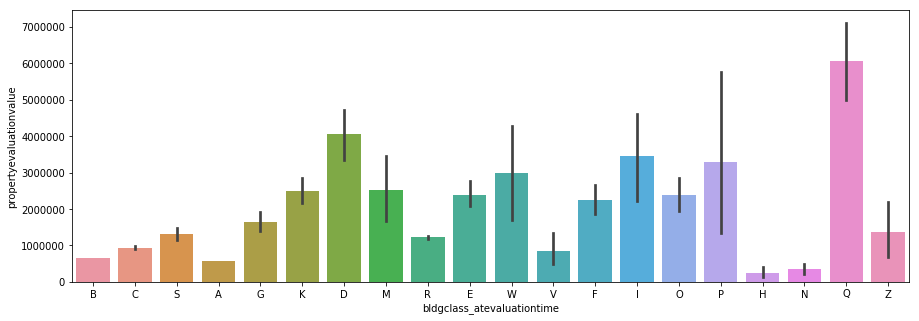

In [1060]:
plt.figure(figsize=(15,5))
sns.barplot(x=X['bldgclass_atevaluationtime'],y=df_train['propertyevaluationvalue'])

In [741]:
#X=X1.copy()

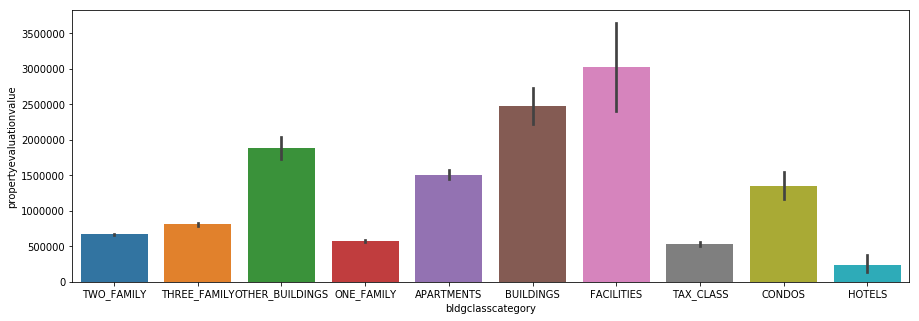

In [1034]:
plt.figure(figsize=(15,5))
sns.barplot(x=X['bldgclasscategory'],y=df_train['propertyevaluationvalue'])

In [874]:
X1=X.copy()

In [875]:
X.shape

(16810, 16)

<h3> Numberical columns

In [876]:
num_cols

Index(['borough', 'zipcode', 'block', 'lot', 'noofresidentialunits',
       'noofcommercialunits', 'totalnoofunits', 'landareainsqft',
       'grossareainsqft', 'yearofconstruction', 'taxclass_atevaluationtime',
       'propertyevaluationvalue'],
      dtype='object')

In [882]:
X.taxclass_atevaluationtime.value_counts()

1    13645
2     2314
4      851
Name: taxclass_atevaluationtime, dtype: int64

In [883]:
drop_cols=['address','surroundings','totalnoofunits']

In [478]:
#X['evaluation_year']=X['dateofevaluation'].dt.year

In [884]:
current_year=2019

In [885]:
X['current_age']=current_year-X['yearofconstruction']

In [886]:
X.shape

(16810, 17)

In [887]:
df_test1=df_test.copy()

In [888]:
df_test['current_age']=current_year-df_test['yearofconstruction']

In [889]:
df_test.shape

(2936, 17)

In [890]:
X.head()

,borough,surroundings,address,zipcode,block,lot,bldgclasscategory,noofresidentialunits,noofcommercialunits,totalnoofunits,landareainsqft,grossareainsqft,yearofconstruction,taxclass_atevaluationtime,bldgclass_atevaluationtime,dateofevaluation,current_age
0,1,BATHGATE,1473 CROTONA PLACE,10456,2927,127,TWO_FAMILY,2,0,2,1900,2394,1990,1,B,2014-05-30,29
1,1,BATHGATE,453 EAST 181,10457,3037,110,THREE_FAMILY,3,0,3,1687,3037,2002,1,C,2014-09-13,17
2,1,BATHGATE,511 EAST 171 STREET,10457,2912,155,TWO_FAMILY,2,0,2,2000,2400,1989,1,B,2014-09-28,30
3,1,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,TWO_FAMILY,2,0,2,2356,2394,1991,1,B,2014-06-05,28
4,1,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,TWO_FAMILY,2,0,2,3346,2308,1993,1,B,2015-02-07,26


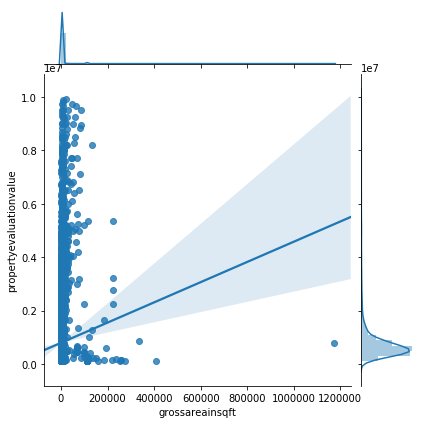

In [1029]:
sns.jointplot(x=X['grossareainsqft'],y=df_train['propertyevaluationvalue'],kind='reg')

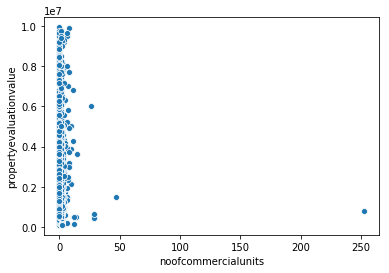

In [1162]:
sns.scatterplot(df_train['noofcommercialunits'],df_train['propertyevaluationvalue'])

In [892]:
df_train['noofcommercialunits'].sum(),df_train['noofresidentialunits'].sum()

(2316, 31304)

In [894]:
#droping totalnoofunits column, where it is explained by noofcommercialunits and noofresidentialunits columns
df_train['totalnoofunits'].sum()

33620

In [895]:
#droping these columns
drop_cols=['address','surroundings','zipcode','yearofconstruction','dateofevaluation','totalnoofunits']

In [896]:
X.drop(drop_cols,axis=1,inplace=True)

In [897]:
X.shape

(16810, 11)

In [642]:
#df_dummies=pd.get_dummies(X,columns=['bldgclasscategory','bldgclass_atevaluationtime'],drop_first=True)

In [901]:
X.head()

,borough,block,lot,bldgclasscategory,noofresidentialunits,noofcommercialunits,landareainsqft,grossareainsqft,taxclass_atevaluationtime,bldgclass_atevaluationtime,current_age
0,1,2927,127,TWO_FAMILY,2,0,1900,2394,1,B,29
1,1,3037,110,THREE_FAMILY,3,0,1687,3037,1,C,17
2,1,2912,155,TWO_FAMILY,2,0,2000,2400,1,B,30
3,1,2929,134,TWO_FAMILY,2,0,2356,2394,1,B,28
4,1,3036,140,TWO_FAMILY,2,0,3346,2308,1,B,26


In [643]:
#df_dummies.shape

(16810, 40)

In [902]:
X_new=pd.get_dummies(X,columns=['bldgclasscategory','bldgclass_atevaluationtime'],drop_first=True)

In [903]:
len(X_new.columns)

37

In [542]:
#df_test=df_test1.copy()

In [904]:
df_test.shape

(2936, 17)

In [905]:
df_test['current_age']=current_year-df_test['yearofconstruction']

In [906]:
df_test1=df_test.copy()
df_test.drop(drop_cols,axis=1,inplace=True)

In [911]:
df_test.shape

(2936, 11)

In [909]:
df_test_new=pd.get_dummies(df_test,columns=['bldgclasscategory','bldgclass_atevaluationtime'],drop_first=True)

In [912]:
len(df_test_new.columns)

33

In [913]:
X_train_aligned, X_test_aligned = X_new.align(df_test_new, join='outer', axis=1, fill_value=0)
print(X_train_aligned.shape)
print(X_test_aligned.shape)

## Checking null values in both train and test data sets
pd.DataFrame({"Train":X_train_aligned.isnull().sum(),"Test":X_test_aligned.isnull().sum()})

(16810, 37)
(2936, 37)


,Train,Test
bldgclass_atevaluationtime_B,0,0
bldgclass_atevaluationtime_C,0,0
bldgclass_atevaluationtime_D,0,0
bldgclass_atevaluationtime_E,0,0
bldgclass_atevaluationtime_F,0,0
bldgclass_atevaluationtime_G,0,0
bldgclass_atevaluationtime_H,0,0
bldgclass_atevaluationtime_I,0,0
bldgclass_atevaluationtime_K,0,0
bldgclass_atevaluationtime_M,0,0


<h3>Train Test Split of Data

In [922]:
X_train, X_test, y_train, y_test = train_test_split(X_train_aligned, y, test_size=0.3, random_state=123)

In [1165]:
print('Train Shape :',X_train.shape)
print('Test Shape :',X_test.shape)

Train Shape : (11767, 37)
Test Shape : (5043, 37)


<h1><center> Model Building

<h3> Random Forest

In [923]:
rf=RandomForestRegressor()

In [924]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [925]:
y_pred_rf=rf.predict(X_test)

In [926]:
np.sqrt(mean_squared_error(y_test,y_pred_rf))

536835.4552519699

<h4> 2nd fit

In [927]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [928]:
mean_absolute_percentage_error(y_train,rf.predict(X_train))

14.705799170748657

In [929]:
mean_absolute_percentage_error(y_test,y_pred_rf)

38.23120468988808

<h4>1st fit

In [ ]:
prnt(12)
np.arive(10)

In [687]:
mean_absolute_percentage_error(y_train,rf.predict(X_train))

14.455878496621061

In [686]:
mean_absolute_percentage_error(y_test,y_pred_rf)

37.55714507611031

<h3> checking for outliers and removing based on Target variable

In [930]:
df_train['propertyevaluationvalue'].describe()

count    1.681000e+04
mean     8.084101e+05
std      8.978317e+05
min      1.000440e+05
25%      4.250000e+05
50%      5.900000e+05
75%      8.450000e+05
max      9.935000e+06
Name: propertyevaluationvalue, dtype: float64

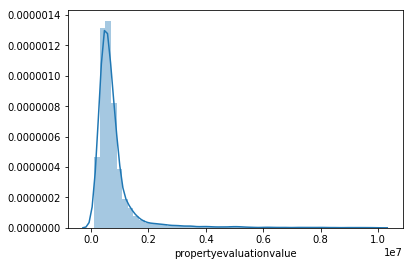

In [931]:
sns.distplot(y)

In [932]:
df_train[(df_train['propertyevaluationvalue']<5000000)].shape


(16603, 17)

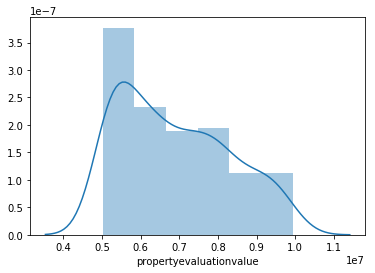

In [933]:
sns.distplot(y[y>5000000])

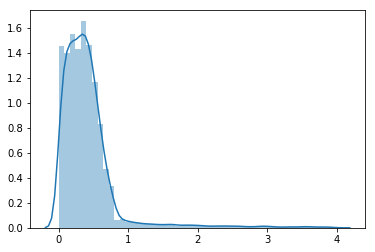

In [934]:
Z=np.abs(stats.zscore(df_train['propertyevaluationvalue']))
sns.distplot(Z[Z<4])

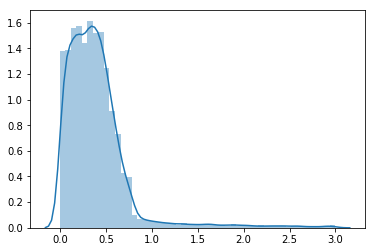

In [935]:
sns.distplot(Z[Z<3])

In [936]:
X_outlier=pd.concat([X_train_aligned,y],axis=1)

In [938]:
X_outlier.shape

(16810, 38)

In [937]:
X_outlier.columns

Index(['bldgclass_atevaluationtime_B', 'bldgclass_atevaluationtime_C',
       'bldgclass_atevaluationtime_D', 'bldgclass_atevaluationtime_E',
       'bldgclass_atevaluationtime_F', 'bldgclass_atevaluationtime_G',
       'bldgclass_atevaluationtime_H', 'bldgclass_atevaluationtime_I',
       'bldgclass_atevaluationtime_K', 'bldgclass_atevaluationtime_M',
       'bldgclass_atevaluationtime_N', 'bldgclass_atevaluationtime_O',
       'bldgclass_atevaluationtime_P', 'bldgclass_atevaluationtime_Q',
       'bldgclass_atevaluationtime_R', 'bldgclass_atevaluationtime_S',
       'bldgclass_atevaluationtime_V', 'bldgclass_atevaluationtime_W',
       'bldgclass_atevaluationtime_Z', 'bldgclasscategory_BUILDINGS',
       'bldgclasscategory_CONDOS', 'bldgclasscategory_FACILITIES',
       'bldgclasscategory_HOTELS', 'bldgclasscategory_ONE_FAMILY',
       'bldgclasscategory_OTHER_BUILDINGS', 'bldgclasscategory_TAX_CLASS',
       'bldgclasscategory_THREE_FAMILY', 'bldgclasscategory_TWO_FAMILY',
       'b

In [939]:

X_outlier=X_outlier[X_outlier['propertyevaluationvalue']<5000000]

<h3> Dropped 207 records based on propertyevaluationvalue grater than 5000000

In [940]:
X_outlier.shape

(16603, 38)

In [943]:
y_outlier=X_outlier['propertyevaluationvalue']
X_outlier=X_outlier.drop('propertyevaluationvalue',axis=1)


In [944]:
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_outlier, y_outlier, test_size=0.3, random_state=123)

In [945]:
rf.fit(X_train_out,y_train_out)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

<h3> 2nd fit

In [947]:
y_pred_rf_out=rf.predict(X_test_out)

In [948]:
mean_absolute_percentage_error(y_train_out,rf.predict(X_train_out))

13.657529184520639

In [949]:
mean_absolute_percentage_error(y_test_out,y_pred_rf_out)

34.09523388602367

([87166.74466676796,
  84610.93052597382,
  82185.21627484327,
  81800.64017048125,
  79283.78970627015,
  77551.76347506995,
  77245.94935075985,
  77095.92710011924,
  77111.43758170556,
  76909.49531743563],
 [233609.60229316397,
  224183.58193436323,
  215158.2814925419,
  214822.67483847067,
  212898.8277848782,
  208311.91246853434,
  204015.69661732804,
  204272.31558797043,
  201106.02787945495,
  196611.32976332484])

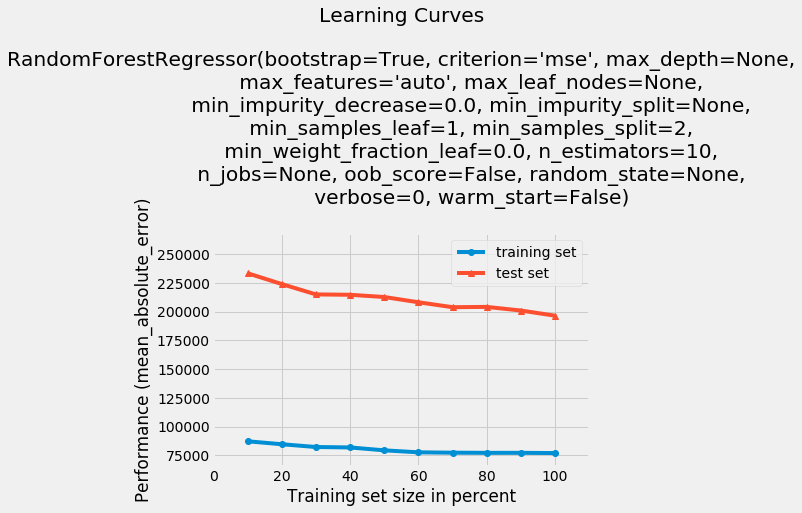

In [950]:
plot_learning_curves(X_train_out,y_train_out,X_test_out,y_test_out, rf,scoring='mean_absolute_error')

<h1> 1st fit-submitted

In [784]:
mean_absolute_percentage_error(y_train_out,rf.predict(X_train_out))

0.011737901398561049

In [782]:
mean_absolute_percentage_error(y_test_out,y_pred_rf_out)

0.027000695654491237

([1750.260154905335,
  995.4714716006879,
  662.8891853126789,
  476.5876506024087,
  306.18470142832547,
  272.7116018930158,
  216.52406883835278,
  223.2436162202861,
  177.8638301940912,
  161.7458182756833],
 [4501.653864685806,
  2159.428106805862,
  1410.1247339891593,
  980.3187311784785,
  760.2599879542264,
  615.5626581007822,
  554.5749648664929,
  491.2625376430431,
  430.23926922304753,
  420.2304356554916])

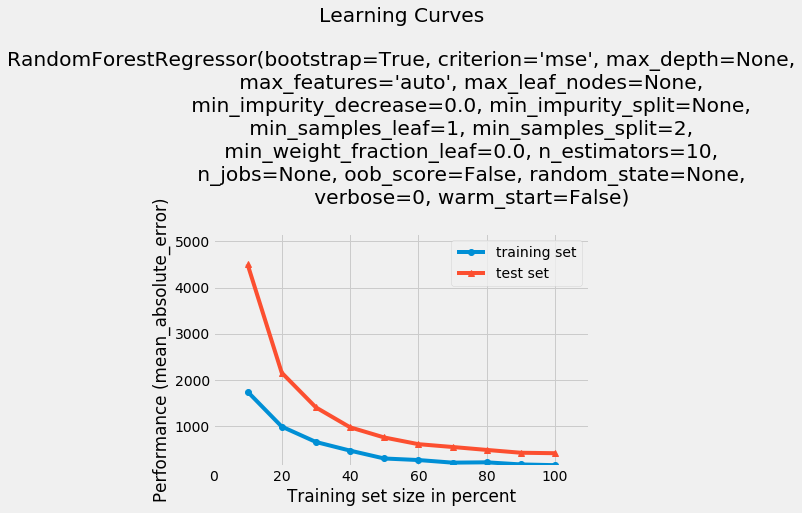

In [788]:
plot_learning_curves(X_train_out,y_train_out,X_test_out,y_test_out, rf,scoring='mean_absolute_error')

In [791]:
y_out=X_outlier['propertyevaluationvalue']
X_outlier=X_outlier.drop('propertyevaluationvalue',axis=1)

In [792]:
rf.fit(X_outlier,y_out)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

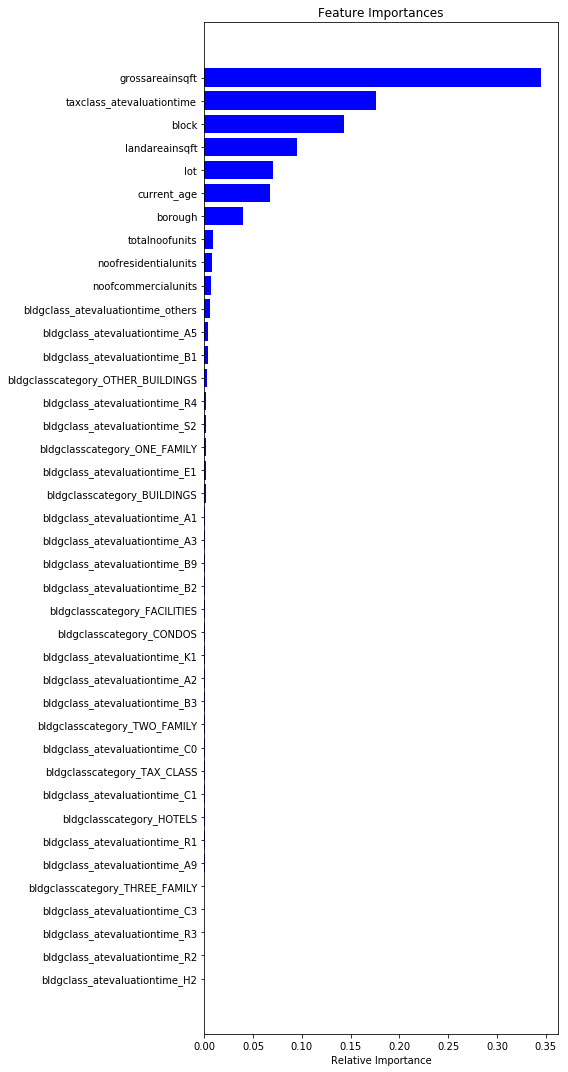

In [797]:
rf.feature_importances_
features = list(X_outlier.columns)
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [794]:
df_id

0       PR51101
1       PR51102
2       PR51103
3       PR51104
4       PR51105
         ...   
2931    PR54032
2932    PR54033
2933    PR54034
2934    PR54035
2935    PR54036
Name: propertyid, Length: 2936, dtype: object

In [793]:
y_pred_final=rf.predict(df_test)

In [795]:
submit=pd.DataFrame({'PropertyID':df_id,'PropertyEvaluationvalue':y_pred_final})
submit.to_csv('submission.csv',index=False)

<h3> GridSearchCV

In [983]:
rf=RandomForestRegressor(random_state=123)

In [1037]:
parameters={
    
    'max_depth':np.arange(3,21,2),

    'min_samples_leaf':[2,4,7]
    
}
rf_grid=GridSearchCV(estimator=rf,param_grid=parameters,n_jobs=-1,cv=10)

In [1038]:
rf_grid.fit(X_train_out,y_train_out)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=123,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 3,  5,  7,  9, 1

In [1039]:
rf_grid.best_params_

{'max_depth': 15, 'min_samples_leaf': 2}

In [1040]:
y_pred_grid=rf_grid.best_estimator_.predict(X_test_out)

In [1041]:
print('Train error:',mean_absolute_percentage_error(y_train_out,rf_grid.best_estimator_.predict(X_train_out)))

Train error: 20.861102253356872


In [1042]:
print('Test error:',mean_absolute_percentage_error(y_test_out,y_pred_rf_out))

Test error: 34.09523388602367


([103463.32761227158,
  107929.39151154237,
  109728.75198277047,
  113205.79862747145,
  111736.93639722274,
  113587.36537075951,
  113593.35602373966,
  111377.89420162914,
  112698.67866206545,
  113428.94970536511],
 [237481.3302062303,
  224545.38810433148,
  218239.7913835968,
  213741.38704396202,
  210035.787793228,
  207712.7989284338,
  205331.06070355137,
  201819.9557036946,
  200927.65181911574,
  200137.55658751528])

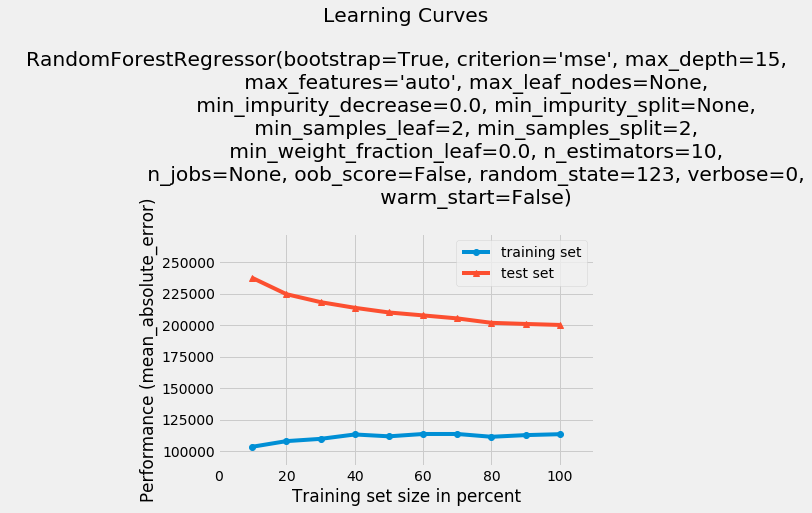

In [1043]:
plot_learning_curves(X_train_out,y_train_out,X_test_out,y_test_out, rf_grid.best_estimator_,scoring='mean_absolute_error')

In [968]:
df1=pd.DataFrame()

<h2> Adding ZipCode to Data frame by implementing Target Encoding

In [972]:
#df_train.groupby('zipcode')['propertyevaluationvalue'].mean().to_dict()
df1['zipcode']=df_train['zipcode'].map(df_train.groupby('zipcode')['propertyevaluationvalue'].mean())

In [ ]:
df_test['zip']

In [974]:
df1['zipcode_test']=df_train['zipcode'].map(df_train.groupby('zipcode')['propertyevaluationvalue'].mean())

In [975]:
df1

,zipcode,zipcode_test
0,6.474823e+05,6.474823e+05
1,8.920597e+05,8.920597e+05
2,8.920597e+05,8.920597e+05
3,8.920597e+05,8.920597e+05
4,8.920597e+05,8.920597e+05
...,...,...
16805,5.217283e+06,5.217283e+06
16806,5.033200e+06,5.033200e+06
16807,5.033200e+06,5.033200e+06
16808,6.620833e+05,6.620833e+05


In [978]:
X_train_aligned=pd.concat([X_train_aligned,df1['zipcode']],axis=1)

In [979]:
X_train_aligned.shape

(16810, 38)

In [995]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_aligned, y, test_size=0.3, random_state=123)

In [996]:
rf.fit(X_train1,y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

In [997]:
y_pred_rd_1=rf.predict(X_test1)

In [1082]:
print('Train Error rf after adding Zipcode:',mean_absolute_percentage_error(y_train1,rf.predict(X_train1)))

Train Error rf after adding Zipcode: 13.674030102338087


In [1081]:
print('Test Error rf after adding Zipcode:',mean_absolute_percentage_error(y_test1,y_pred_rd_1))

Test Error rf after adding Zipcode: 34.928598701499055


<h3> Standadization

In [1000]:
c=list(X_train1.columns)

In [1002]:
print(X_train1.shape, y_train1.shape)
print(X_test1.shape, y_test1.shape)

(11767, 38) (11767,)
(5043, 38) (5043,)


In [1003]:
std=StandardScaler()
std.fit(X_train1)
X_train1_std=std.transform(X_train1)
X_test1_std=std.transform(X_test1)

In [1004]:
X_train1_std.shape

(11767, 38)

In [1005]:
X_test1_std.shape

(5043, 38)

In [1006]:
X_train1_std=pd.DataFrame(X_train1_std,columns=c)

In [1007]:
X_test1_std=pd.DataFrame(X_test1_std,columns=c)

<h3>KNN Regressor

In [1008]:

KNN = KNeighborsRegressor(n_neighbors=5,metric='manhattan',leaf_size=40,p=3,weights='distance',algorithm = 'kd_tree')


In [1009]:
KNN.fit(X_train1_std,y_train1)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=40, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                    weights='distance')

In [1010]:
y_pred_knn=KNN.predict(X_test1_std)

In [1079]:
print('Test Error for Knn:',mean_absolute_percentage_error(y_test1,y_pred_knn))

Test Error for Knn: 36.545818864051824


In [1080]:
print('Train error fro Knn: ',mean_absolute_percentage_error(y_train1,KNN.predict(X_train1_std)))

Train error fro Knn:  0.9490372517640739


In [1014]:
grid_params = {
    'n_neighbors':[7,9,11,13,15,17],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan']
}

In [1015]:
knn_grid=GridSearchCV(KNN,grid_params,cv=5,n_jobs=-1)

In [1016]:
knn_grid.fit(X_train1_std,y_train1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='kd_tree', leaf_size=40,
                                           metric='manhattan',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=3,
                                           weights='distance'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [7, 9, 11, 13, 15, 17],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1018]:
y_pred_knn_grid=knn_grid.predict(X_test1_std)

In [1078]:
print('Test Error for Knn Grid :',mean_absolute_percentage_error(y_test1,y_pred_knn_grid))

Test Error for Knn Grid : 36.92970633224194


In [1077]:
print('Train error for Knn Grid: ',mean_absolute_percentage_error(y_train1,knn_grid.predict(X_train1_std)))

Train error for Knn Grid:  0.9488523344186579


<h3> Lasso Model

In [1046]:
Lasso=Lasso()

In [1047]:
Lasso.fit(X_train1_std,y_train1)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1049]:
y_pred_lasso=Lasso.predict(X_test1_std)

In [1076]:
print('Train Error for Lasso: ',mean_absolute_percentage_error(y_train1,Lasso.predict(X_train1_std)))

Train Error for Lasso:  48.5947855401187


In [1075]:
print('Train Error for Lasso: ',mean_absolute_percentage_error(y_test1,y_pred_lasso))

Train Error for Lasso:  51.29005654081217


<h3> Decision Tree

In [1051]:
dt=DecisionTreeRegressor()

In [1052]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [1053]:
y_pred_dt=dt.predict(X_test)

In [1072]:
print('Train error for Decision Trees:',mean_absolute_percentage_error(y_train,dt.predict(X_train)))

Train error for Decision Trees: 0.991293056175004


In [1071]:
print('Test error for Decision Trees:',mean_absolute_percentage_error(y_test,y_pred_dt))

Test error for Decision Trees: 43.97648344010584


<h3> Stacking

In [1056]:
stack = np.array([y_pred_dt,y_pred_lasso,y_pred_knn_grid]).T

In [1057]:
y_test_pred_stacked = np.mean(stack,axis=1)

In [1074]:
print('Stacking Test error:',mean_absolute_percentage_error(y_test,y_test_pred_stacked))

Stacking Test error: 39.462051788079876


<H2>Linear Regression

In [1113]:
from sklearn.linear_model import LinearRegression

In [1114]:
lr=LinearRegression()

In [1115]:
lr.fit(X_train1_std,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1116]:
y_pred_lr=lr.predict(X_test1_std)

In [1117]:
print('Train error for Linear Regression :',mean_absolute_percentage_error(y_test1,y_pred_lr))

Train error for Linear Regression : 51.27571123893661
